In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gan-model-dataset/2015.csv
/kaggle/input/gan-model-dataset/2017.csv
/kaggle/input/gan-model-dataset/2019.csv
/kaggle/input/gan-model-dataset/main_data.csv
/kaggle/input/gan-model-dataset/2018.csv
/kaggle/input/gan-model-dataset/2016.csv


In [2]:
# Full Implementation of Advanced GAN Enhancements with Integrated GAN Architecture

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from transformers import AutoModel, AutoTokenizer
from moviepy.editor import ImageClip, concatenate_videoclips

In [3]:
# ===========================
# DataProcessor Component
# ===========================

def load_data(file_path):
    """Loads data from various formats like CSV, XLSX, or TXT."""
    import pandas as pd
    if file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.txt'):
        data = pd.read_csv(file_path, delimiter='\t')
    else:
        raise ValueError("Unsupported file format.")
    return data

In [4]:
# ===========================
# PromptAnalyzer Component
# ===========================

def analyze_prompt(prompt):
    """Extracts conditions or key details from user input prompts."""
    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
    model = AutoModel.from_pretrained("bert-base-uncased")
    tokens = tokenizer(prompt, return_tensors="pt")
    embeddings = model(**tokens).last_hidden_state.mean(dim=1)
    return embeddings

In [5]:
# ===========================
# SceneGenerator Component
# ===========================

def generate_scene_instructions(data, prompt_embedding):
    """Generates scene-level instructions based on data and prompt."""
    instructions = []
    for column in data.columns:
        instructions.append(f"Plot {column} as a bar chart.")
    return instructions

In [6]:
# ===========================
# GAN Architecture Components
# ===========================

class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [7]:
# ===========================
# Conditional GAN (cGAN)
# ===========================

class ConditionalGenerator(nn.Module):
    def __init__(self, noise_dim, condition_dim, output_dim):
        super(ConditionalGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim + condition_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, noise, condition):
        x = torch.cat([noise, condition], dim=1)
        return self.model(x)

class ConditionalDiscriminator(nn.Module):
    def __init__(self, input_dim, condition_dim):
        super(ConditionalDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim + condition_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )

    def forward(self, data, condition):
        x = torch.cat([data, condition], dim=1)
        return self.model(x)


In [8]:
# ===========================
# VideoGenerator Component
# ===========================

def create_video(images):
    clips = [ImageClip(image).set_duration(3) for image in images]
    video = concatenate_videoclips(clips)
    video.write_videofile("infographic_video.mp4", fps=24)

In [9]:
# ===========================
# VideoExplanationPipeline
# ===========================

def video_explanation_pipeline(file_path, prompt):
    """End-to-end pipeline to generate infographic videos."""
    # Step 1: Load data
    data = load_data(file_path)

    # Step 2: Analyze prompt
    prompt_embedding = analyze_prompt(prompt)

    # Step 3: Generate scene instructions
    scene_instructions = generate_scene_instructions(data, prompt_embedding)

    # Step 4: Generate visuals (using GAN and Conditional GAN)
    noise_dim = 100
    condition_dim = 768
    image_dim = 256 * 256 * 3

    # Instantiate GAN models
    generator = Generator(input_dim=noise_dim, output_dim=image_dim)
    conditional_generator = ConditionalGenerator(noise_dim=noise_dim, condition_dim=condition_dim, output_dim=image_dim)

    # Generate visuals using both GAN and Conditional GAN
    noise = torch.randn(len(scene_instructions), noise_dim)
    visuals = []

    for i in range(len(scene_instructions)):
        conditional_visual = conditional_generator(noise[i:i+1], prompt_embedding).detach().numpy().reshape(256, 256, 3)
        visuals.append(conditional_visual)

    # Step 5: Create video
    create_video(visuals)

In [10]:
# ===========================
# Example Usage
# ===========================

if __name__ == "__main__":
    file_path = "/kaggle/input/gan-model-dataset/2015.csv"
    prompt = "Create an engaging infographic video about sales trends."
    video_explanation_pipeline(file_path, prompt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Moviepy - Building video infographic_video.mp4.
Moviepy - Writing video infographic_video.mp4



Moviepy - Done !
Moviepy - video ready infographic_video.mp4


In [11]:
# new approach 

In [78]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import logging
import os

# Setting up logging
logging.basicConfig(level=logging.INFO)

def load_and_preprocess_data(file_path, important_columns=None, outlier_method="zscore"):
    """Load and preprocess data with enhanced flexibility."""
    
    # Check if file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file at {file_path} does not exist.")
    
    # Get the file extension and load the data
    file_extension = file_path.split('.')[-1].lower()  # Get file extension
    logging.info(f"Loading data from file: {file_path}, extension: {file_extension}")

    if important_columns is None:
        important_columns = []

    # Load data
    if file_extension == 'csv':
        data = pd.read_csv(file_path)
    elif file_extension == 'xlsx':
        data = pd.read_excel(file_path)
    elif file_extension == 'txt':
        data = pd.read_csv(file_path, delimiter='\t')
    else:
        raise ValueError(f"Unsupported file format: {file_extension}")

    logging.info(f"Data loaded successfully with shape: {data.shape}")
    
    # Handle missing values
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    categorical_cols = data.select_dtypes(include=[object]).columns

    # Fill missing values
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
    for col in categorical_cols:
        data[col] = data[col].fillna(data[col].mode()[0])
    
    if important_columns:
        data = data.dropna(subset=important_columns)

    logging.info(f"Missing values handled. Categorical columns filled with mode, numerical with mean.")

    # Handle outliers
    original_shape = data.shape
    if outlier_method == "zscore":
        z_scores = np.abs(stats.zscore(data[numeric_cols]))
        data = data[(z_scores < 3).all(axis=1)]
    elif outlier_method == "iqr":
        for col in numeric_cols:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]
    else:
        logging.warning(f"Unsupported outlier method: {outlier_method}. Skipping outlier handling.")
    
    removed_rows = original_shape[0] - data.shape[0]
    logging.info(f"Outliers removed. {removed_rows} rows were discarded.")
    
    # Encode categorical variables
    data = pd.get_dummies(data, drop_first=True)

    # Scale features
    scaler = StandardScaler()
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

    # Ensure the output is a DataFrame
    if not isinstance(data, pd.DataFrame):
        raise TypeError("The processed data is not a pandas DataFrame.")
    
    # Log processed data and its type
    logging.info(f"Processed data (first 5 rows):\n{data.head()}")
    logging.info(f"Data type after preprocessing: {type(data)}")
    
    return data

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import logging
import os

# Setting up logging
logging.basicConfig(level=logging.INFO)

def perform_eda(data, max_visualizations=5, save_plots=False, output_dir="eda_plots"):
    """
    Perform exploratory data analysis to extract insights and identify key relationships.
    
    Args:
        data (pd.DataFrame): Input dataset for analysis.
        max_visualizations (int): Maximum number of features to visualize for each plot type.
        save_plots (bool): Whether to save plots instead of displaying them.
        output_dir (str): Directory to save plots if save_plots is True.
    
    Returns:
        pd.DataFrame: Summary statistics of the dataset.
    """
    # Create output directory if saving plots
    if save_plots and not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Step 1: Basic summary statistics
    logging.info("Generating summary statistics...")
    summary = data.describe()
    logging.info(f"Summary Statistics:\n{summary}")
    
    # Additional: Skewness and Kurtosis
    skewness = data.skew()
    kurtosis = data.kurtosis()
    logging.info(f"Skewness:\n{skewness}")
    logging.info(f"Kurtosis:\n{kurtosis}")
    
    # Step 2: Missing value analysis
    logging.info("Checking for missing values...")
    missing_values = data.isnull().sum()
    logging.info(f"Missing Values:\n{missing_values}")
    
    # Optional: Visualize missing values
    if save_plots:
        plt.figure(figsize=(8, 6))
        sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
        plt.title("Missing Values Heatmap")
        plt.savefig(f"{output_dir}/missing_values_heatmap.png")
        plt.close()
    else:
        plt.figure(figsize=(8, 6))
        sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
        plt.title("Missing Values Heatmap")
        plt.show()

    # Step 3: Distribution of numerical features
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    for i, col in enumerate(numerical_cols[:max_visualizations]):
        plt.figure(figsize=(8, 6))
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        if save_plots:
            plt.savefig(f"{output_dir}/distribution_{col}.png")
            plt.close()
        else:
            plt.show()

    # Step 4: Correlation heatmap
    logging.info("Generating correlation heatmap...")
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    if save_plots:
        plt.savefig(f"{output_dir}/correlation_matrix.png")
        plt.close()
    else:
        plt.show()

    # Step 5: Pairplot
    logging.info("Generating pairplot...")
    if len(numerical_cols) > 1:
        sns.pairplot(data[numerical_cols].iloc[:, :max_visualizations])
        if save_plots:
            plt.savefig(f"{output_dir}/pairplot.png")
            plt.close()
        else:
            plt.show()
    else:
        logging.info("Not enough numerical features for a pairplot.")

    # Step 6: Boxplots for outliers
    logging.info("Generating boxplots for outlier detection...")
    for i, col in enumerate(numerical_cols[:max_visualizations]):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col}')
        if save_plots:
            plt.savefig(f"{output_dir}/boxplot_{col}.png")
            plt.close()
        else:
            plt.show()

    return summary

In [80]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import logging
import time

# Setting up logging
logging.basicConfig(level=logging.INFO)

def analyze_prompt_for_insights(prompt, model_name="gpt2"):
    """Analyze the prompt using GPT-2 to extract actionable insights."""
    
    try:
        # Load tokenizer and model
        tokenizer = GPT2Tokenizer.from_pretrained(model_name)
        model = GPT2LMHeadModel.from_pretrained(model_name)

        # Prepare input for GPT-2 model
        inputs = tokenizer.encode(prompt, return_tensors="pt")

        # Generate output using the model
        outputs = model.generate(
            inputs,
            max_length=200,           # Limit the length of the generated text
            num_return_sequences=1,   # Return only one sequence
            temperature=0.7,          # Control randomness
            top_p=0.9,                # Control diversity via nucleus sampling
            top_k=50,                 # Use top-k sampling
            no_repeat_ngram_size=2,   # Avoid repeating n-grams
            pad_token_id=tokenizer.eos_token_id  # Set padding token id
        )

        # Decode the generated output to get the relevant insights
        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        
        # Log the generated text
        logging.info(f"Generated Text: {generated_text}")

        # Post-process to extract structured insights
        insights = extract_insights_from_text(generated_text)
        
        # Convert dictionary to list of strings for compatibility
        insights_list = [insight for insight, present in insights.items() if present]
        
        return insights_list
        
    except Exception as e:
        logging.error(f"Error in analyzing prompt for insights: {e}")
        return []

def extract_insights_from_text(text, custom_insights=None):
    """Extract structured insights from the raw text generated by the model."""
    
    # Default possible insights categories if none are provided
    possible_insights = custom_insights if custom_insights else ["trend", "comparison", "distribution", "correlation"]
    
    # Initialize empty dictionary to store identified insights
    insights = {insight: False for insight in possible_insights}
    
    # Convert the text to lowercase to make the search case-insensitive
    text = text.lower()
    
    # Check for each possible insight category
    for insight in possible_insights:
        if insight in text:
            insights[insight] = True
    
    return insights


# Example usage:
# prompt = "Create an engaging infographic video comparing sales trends over time and regional performance."
# insights = analyze_prompt_for_insights(prompt)
# logging.info(f"Extracted Insights: {insights}")

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def generate_visualizations(data, insights):
    """
    Generate visualizations based on insights extracted from the data.
    This function dynamically adapts to the nature of the data and selects the appropriate visualization technique.
    """
    try:
        # Ensure that data is not empty and insights are available
        if data.empty:
            raise ValueError("Data is empty.")
        if not insights:
            raise ValueError("No insights available to generate visualizations.")
        
        visuals = []
        
        # Check if the data is time series (Date or Datetime column) and numerical data for plotting
        if 'Date' in data.columns or 'Datetime' in data.columns:
            time_column = 'Date' if 'Date' in data.columns else 'Datetime'
            numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
            if len(numeric_columns) > 0:
                # Plot Time Series Data
                plt.figure(figsize=(10, 6))
                for col in numeric_columns:
                    plt.plot(data[time_column], data[col], label=col)
                plt.title(f"Time Series Plot for {', '.join(numeric_columns)}")
                plt.xlabel('Time')
                plt.ylabel('Values')
                plt.xticks(rotation=45)
                plt.legend()
                visuals.append(plt)
        
        # Check for Correlation Matrix for numerical data
        if data.select_dtypes(include=['float64', 'int64']).shape[1] > 1:
            corr_matrix = data.corr()
            plt.figure(figsize=(10, 6))
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
            plt.title('Correlation Matrix')
            visuals.append(plt)
        
        # Check for categorical data (e.g., bar plots)
        categorical_columns = data.select_dtypes(include=['object', 'category']).columns
        if len(categorical_columns) > 0:
            for col in categorical_columns:
                plt.figure(figsize=(8, 6))
                sns.countplot(x=col, data=data)
                plt.title(f"Distribution of {col}")
                visuals.append(plt)

        # Check for pairwise relationships in numerical data (Pairplot)
        numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
        if len(numeric_columns) > 1:
            sns.pairplot(data[numeric_columns])
            plt.suptitle('Pairwise Relationships')
            visuals.append(plt)

        # If no visuals generated, return None
        if not visuals:
            return None
        
        return visuals

    except Exception as e:
        raise ValueError(f"Error generating visualizations: {e}")

In [73]:
!pip install -U kaleido

import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from moviepy.editor import ImageSequenceClip, AudioFileClip, concatenate_videoclips
import io
import os
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from PIL import Image
import random
import plotly.io as pio
from io import BytesIO
import matplotlib.pyplot as plt
import logging
import time

# Setting up logging
logging.basicConfig(level=logging.INFO)


# Step 1: Generate frames from data
def generate_frames_from_data(data, insights):
    """
    Generate frames from the data for infographic video creation.
    
    Parameters:
    - data: DataFrame containing the data to visualize
    - insights: List of insights to generate frames for (e.g., ['trend', 'comparison'])
    
    Returns:
    - frames: List of generated matplotlib figures
    """
    # Step 1: Check the type of 'data'
    print(f"Data type: {type(data)}")  # This line prints the type of 'data'
    
    if not isinstance(data, pd.DataFrame):
        raise TypeError("Expected 'data' to be a pandas DataFrame.")
    
    if not isinstance(insights, list) or not all(isinstance(i, str) for i in insights):
        raise ValueError("Expected 'insights' to be a list of strings.")
    
    frames = []
    required_columns = ['date', 'sales']

    # Step 2: Ensure required columns are present
    missing_columns = [col for col in required_columns if col not in data.columns]
    if missing_columns:
        raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")

    # Step 3: Generate frames based on insights
    for insight in insights:
        fig, ax = plt.subplots()

        if insight == 'trend':
            ax.plot(data['date'], data['sales'], label='Sales Trend')
            ax.set_title('Sales Trend')
            ax.set_xlabel('Date')
            ax.set_ylabel('Sales')
            ax.legend()
            frames.append(fig)

        elif insight == 'comparison':
            ax.bar(data['region'], data['sales'], label='Regional Sales')
            ax.set_title('Regional Sales Comparison')
            ax.set_xlabel('Region')
            ax.set_ylabel('Sales')
            ax.legend()
            frames.append(fig)

        # Example additional insight: 'distribution'
        elif insight == 'distribution':
            ax.hist(data['sales'], bins=10, color='skyblue', label='Sales Distribution')
            ax.set_title('Sales Distribution')
            ax.set_xlabel('Sales')
            ax.set_ylabel('Frequency')
            ax.legend()
            frames.append(fig)

    return frames

# Step 2: Use a pre-trained model (GPT or similar) to generate video frames
def generate_video_frames_with_gpt(input_frames):
    """
    This function uses a model like GPT to generate the video frames 
    from the given initial set of frames. In practice, this would involve 
    passing frames to the model for frame prediction.
    
    Parameters:
    input_frames: List of initial video frames

    Returns:
    List of generated video frames (smooth transition)
    """
    # Placeholder: You would load and apply a model like GPT or other
    generated_frames = []
    
    # Simulating the addition of random noise (for now, replace with actual model logic)
    for i in range(len(input_frames)):
        original_frame = np.array(input_frames[i])

        if original_frame.shape[2] == 4:  # If it has an alpha channel
            original_frame = original_frame[:, :, :3]  # Remove alpha channel

        if len(original_frame.shape) == 2:
            original_frame = np.stack([original_frame] * 3, axis=-1)  # Convert grayscale to RGB

        noise = np.random.randint(0, 20, (original_frame.shape[0], original_frame.shape[1], 3))
        new_frame = np.clip(original_frame + noise, 0, 255).astype(np.uint8)

        img_pil = Image.fromarray(new_frame)
        generated_frames.append(img_pil)
    
    return generated_frames
# Step 3: Combine frames into a video with MoviePy

def create_video_from_frames(frames, audio_file=None, video_file="final_video.mp4"):
    """
    Combines the generated frames into a video using MoviePy.

    Parameters:
    - frames: List of frames (PIL Image objects).
    - audio_file: Optional path to the background music.
    - video_file: Output video file name.

    Returns:
    - None
    """
    # Convert the PIL images to MoviePy ImageClips
    video_clips = [ImageSequenceClip([np.array(frame)], fps=24) for frame in frames]
    
    # Concatenate the video clips instead of using append
    video = video_clips[0]
    for clip in video_clips[1:]:
        video = concatenate_videoclips([video, clip], method="compose")

    # Add background music (if exists)
    if audio_file and os.path.isfile(audio_file):  # Ensure the file exists
        audio = AudioFileClip(audio_file)
        video = video.set_audio(audio)

    # Write the video to the file
    video.write_videofile(video_file, codec="libx264", fps=24)

# Step 4: Create a full video generation pipeline

def generate_infographic_video(data,insights, audio_file=None, title_image="title_screen.png"):
    """
    Generate a complete infographic video using AI video generation.
    - Generates frames from data.
    - Uses a transformer model to generate smooth transitions.
    - Combines frames into a final video.
    
    Parameters:
    - data: Pandas DataFrame with the data to visualize.
    - insights: List of insights to generate visualizations.
    - audio_file: Path to background audio file.
    - title_image: Path to title image.
    
    Returns:
    - None
    """
    # Step 1: Generate the visualizations (frames) based on insights
    frames = generate_frames_from_data(data ,insights)
    
    # Step 2: Use the AI model to generate additional frames (smooth transitions)
    generated_frames = generate_video_frames_with_gpt(frames)

    # Step 3: Add title image (optional) at the start of the video
    if os.path.exists(title_image):
        title_image_clip = Image.open(title_image)
        generated_frames.insert(0, title_image_clip)
    
    # Step 4: Combine frames into video and add background music
    create_video_from_frames(generated_frames, audio_file)

    print("Video successfully generated!")

# # Example usage:
# data = pd.DataFrame({
#     'date': ['2023-01-01', '2023-01-02', '2023-01-03'],
#     'sales': [100, 200, 300],
#     'region': ['North', 'South', 'East'],
#     'revenue': [5000, 6000, 7000],
#     'age': [25, 30, 35]
# })

# insights = ['trend', 'comparison', 'distribution', 'correlation']
# audio_file = "file.mp3"  # Ensure you provide a valid audio file path
# title_image = "title_screen.png"  # Ensure you provide a valid title image path
# generate_infographic_video(data, insights, audio_file=audio_file, title_image=title_image)

In [83]:
import pandas as pd
import logging
import time

# Assuming load_and_preprocess_data is defined elsewhere

def data_storytelling_pipeline(file_path, prompt, audio_file=None):
    """Complete pipeline to process data, generate insights, and create an infographic video."""
    
    try:
        # Start Timer
        start_time = time.time()
        
        # Step 1: Load and preprocess data
        data = load_and_preprocess_data(file_path)
        
        # Debugging: Log type of data
        logging.debug(f"Type of 'data' after loading: {type(data)}")
        
        # Ensure data is a pandas DataFrame
        if not isinstance(data, pd.DataFrame):
            logging.error(f"Loaded data is not a pandas DataFrame. Type of 'data': {type(data)}")
            raise TypeError("Input 'data' must be a pandas DataFrame.")
        
        # Log a preview of the data to verify it
        logging.info(f"Data loaded successfully. First 5 rows: \n{data.head()}")
        
        # Step 2: Perform exploratory data analysis (EDA)
        eda_summary = perform_eda(data)
        
        # Step 3: Analyze the user's prompt to extract insights
        insights = analyze_prompt_for_insights(prompt)
        
        # Log extracted insights for debugging
        logging.info(f"Extracted insights: {insights}")
        
        if not insights:
            logging.warning("No insights extracted from prompt.")
        
        # Step 4: Generate visualizations based on insights
        visuals = generate_visualizations(data, insights)
        
        # Check if visuals were generated
        if not visuals:
            logging.warning("No visuals generated. Check insights and data.")
        
        # Debugging: Log type of 'data' before infographic video
        logging.debug(f"Type of 'data' before infographic video: {type(data)}")
        
        # Step 5: Create the infographic video
        logging.info("Creating infographic video...")
        generate_infographic_video(visuals, insights, audio_file)
        
        # End Timer
        end_time = time.time()
        logging.info(f"Pipeline completed in {end_time - start_time:.2f} seconds")
        
    except FileNotFoundError as fnf_error:
        logging.error(f"File not found: {fnf_error}")
        raise
    except TypeError as type_error:
        logging.error(f"Data type error: {type_error}")
        raise
    except Exception as e:
        logging.error(f"Error in the data storytelling pipeline: {e}")
        raise

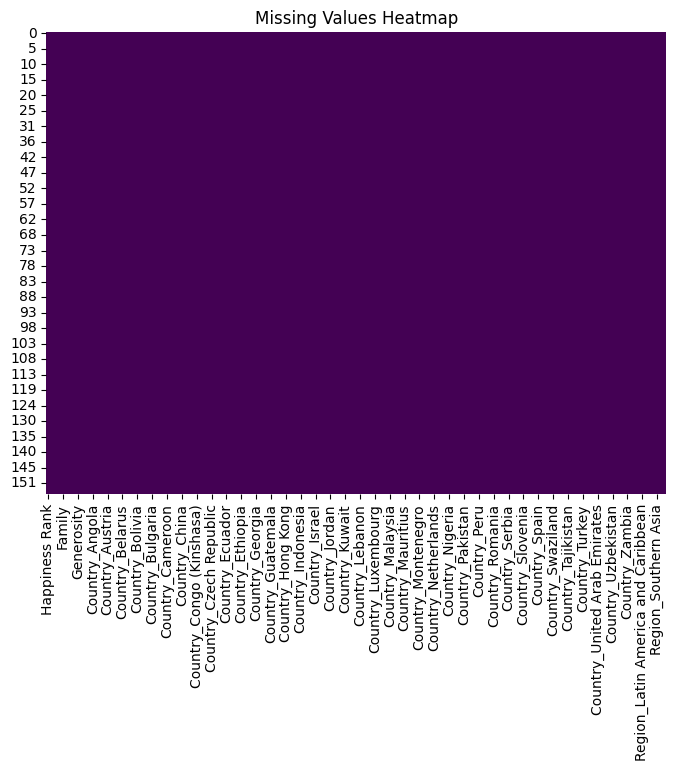

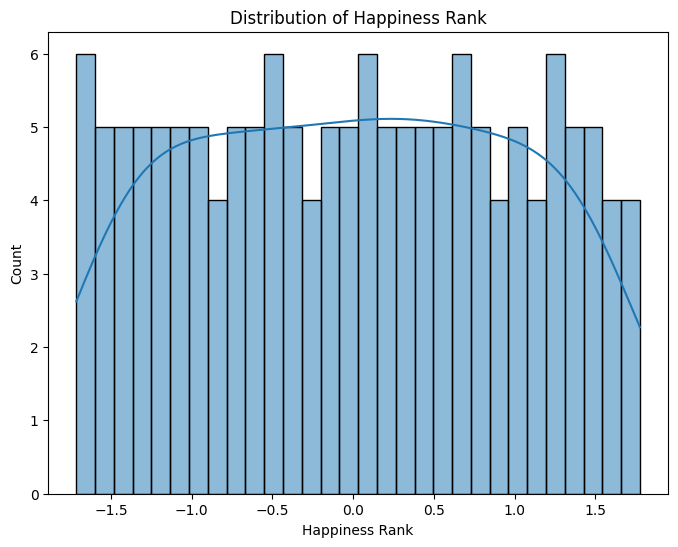

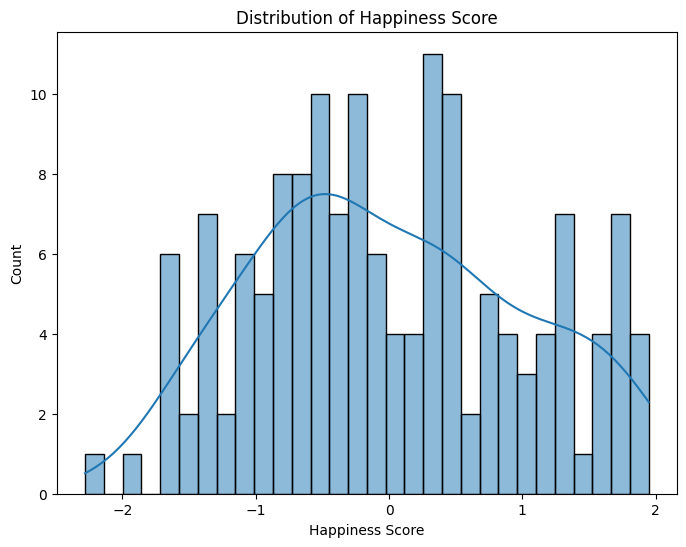

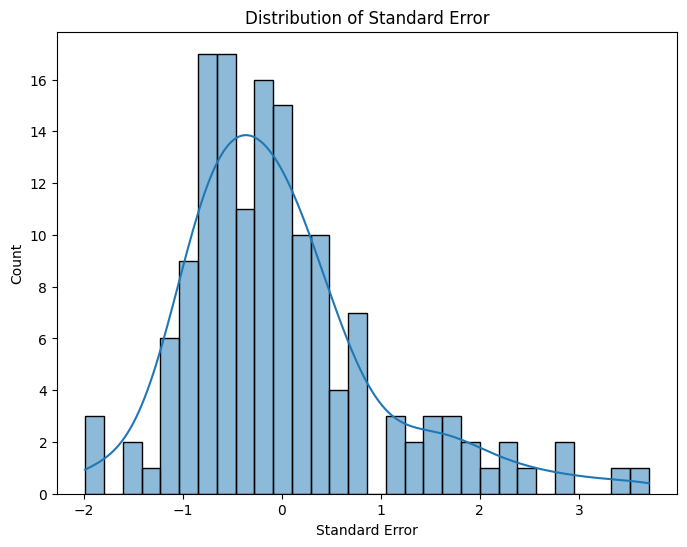

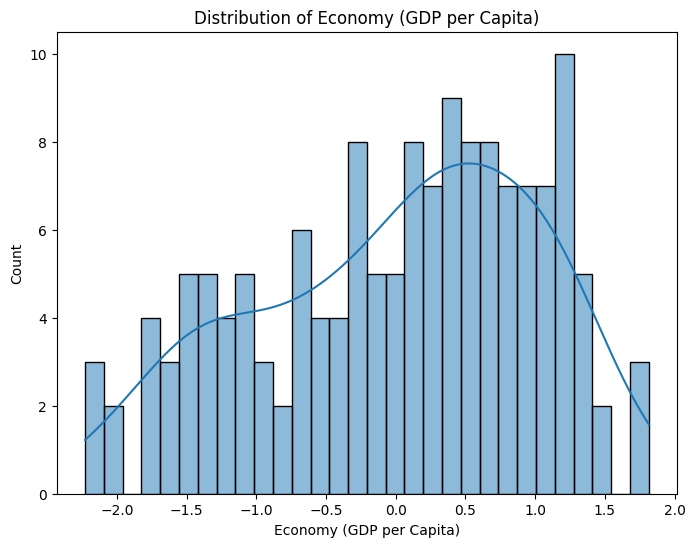

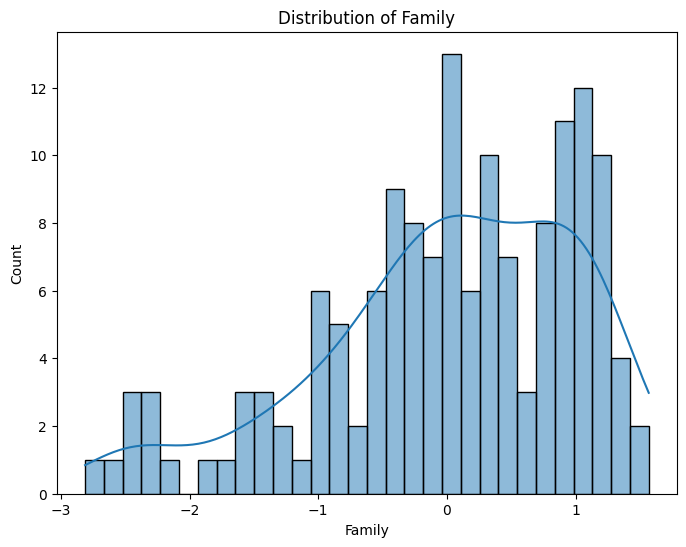

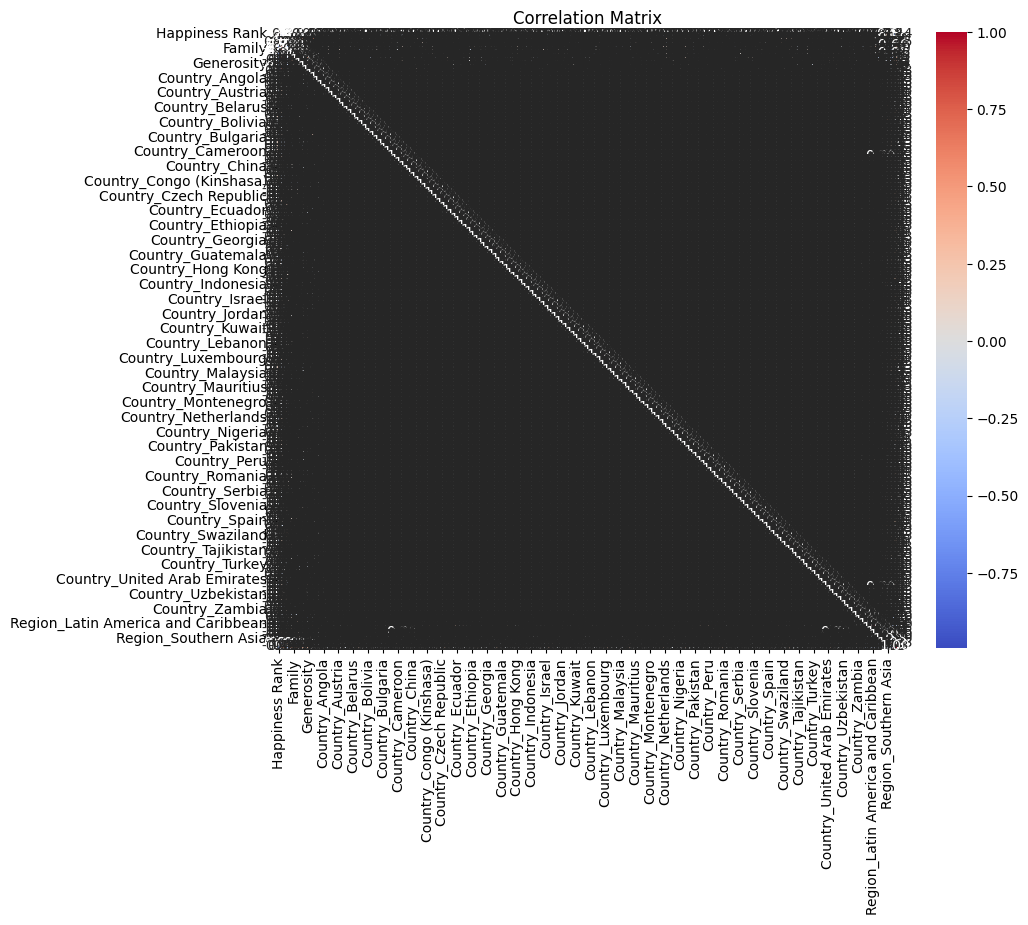

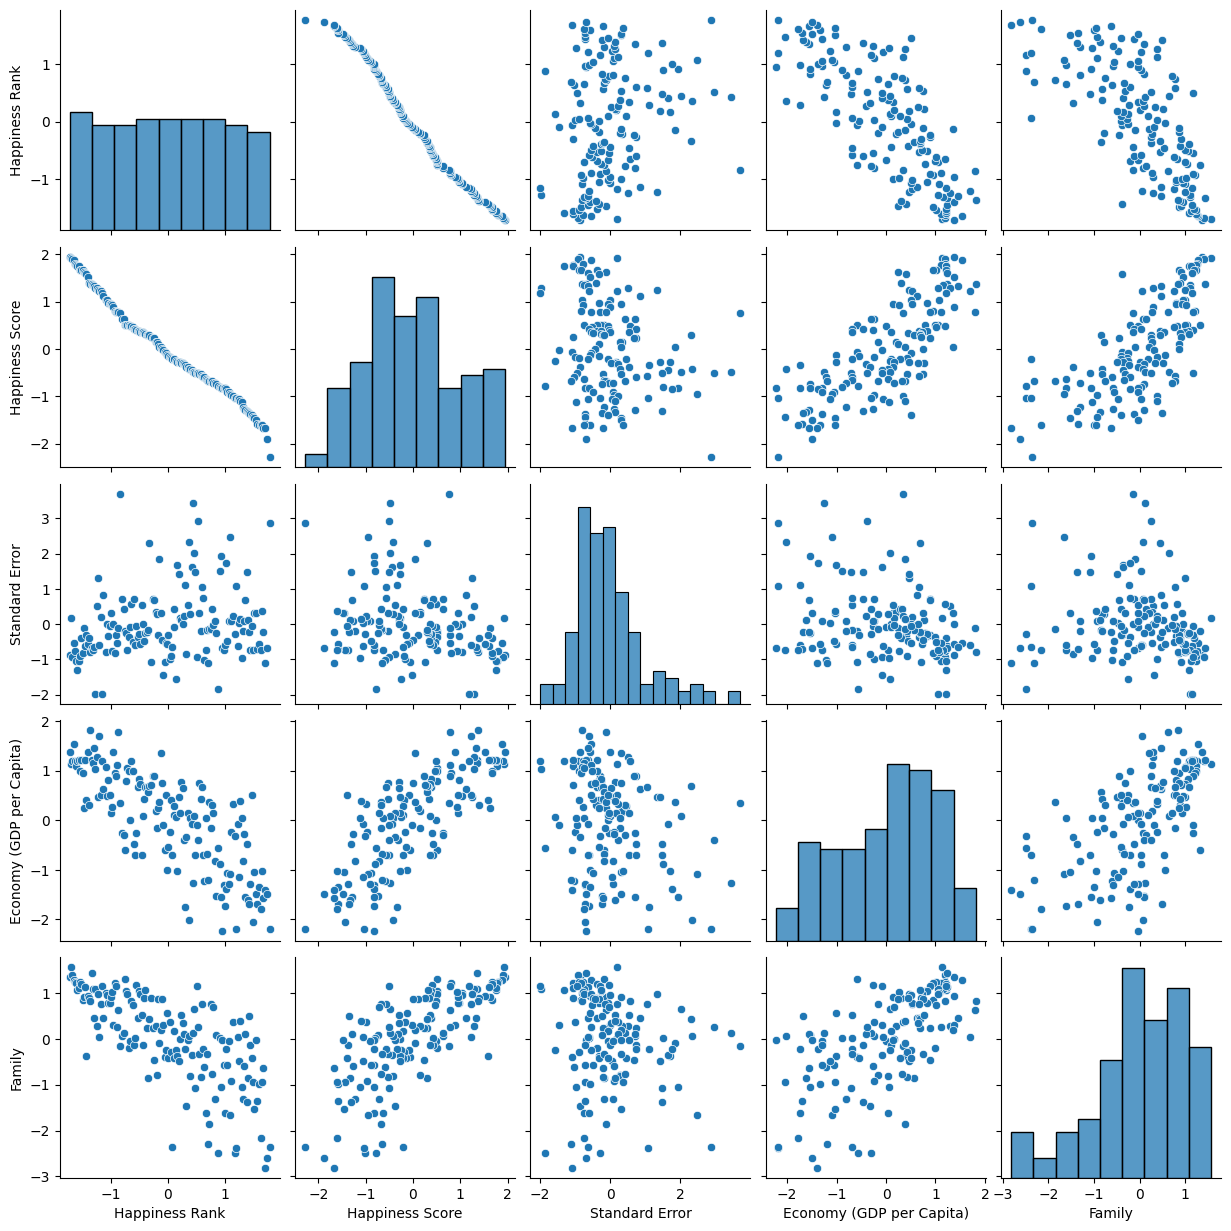

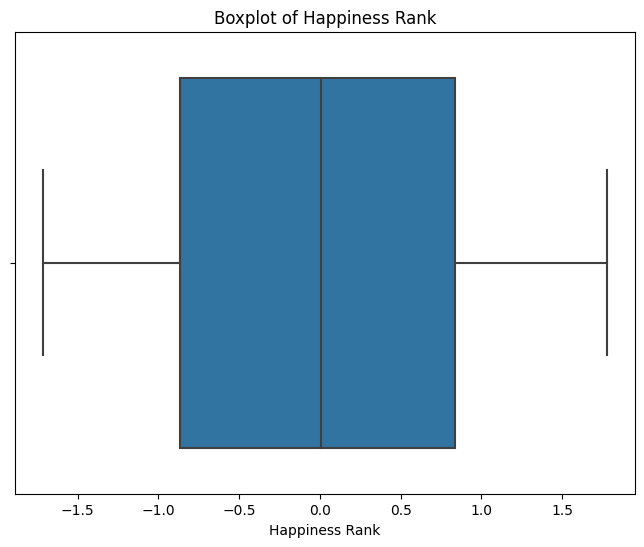

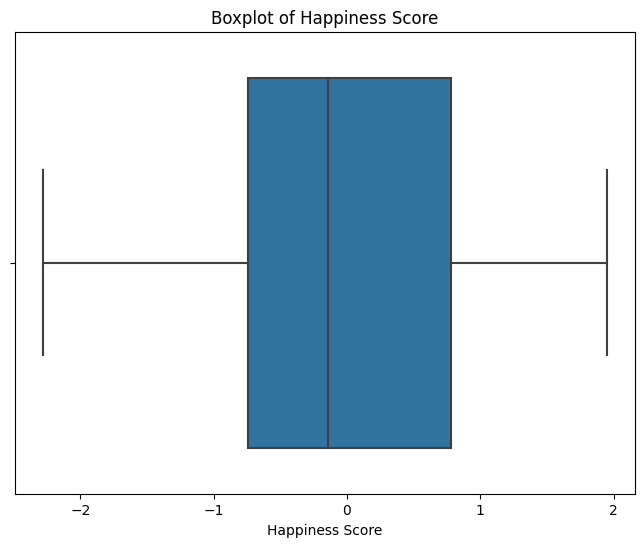

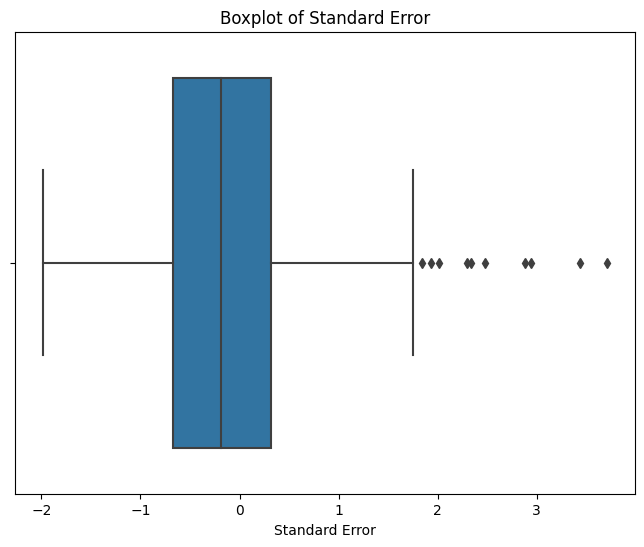

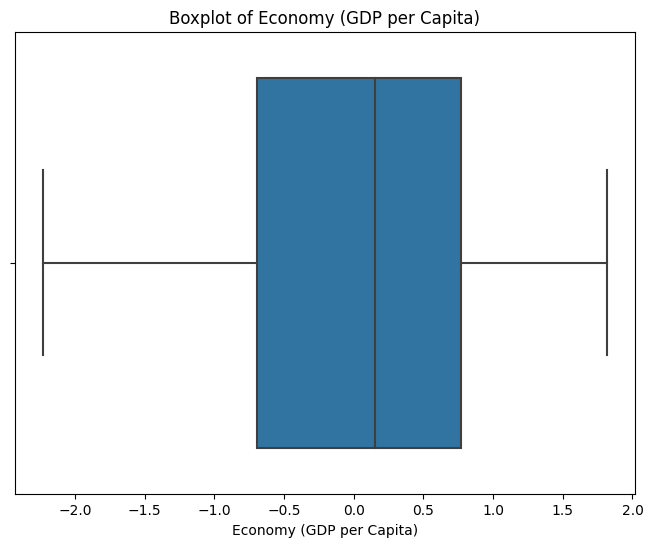

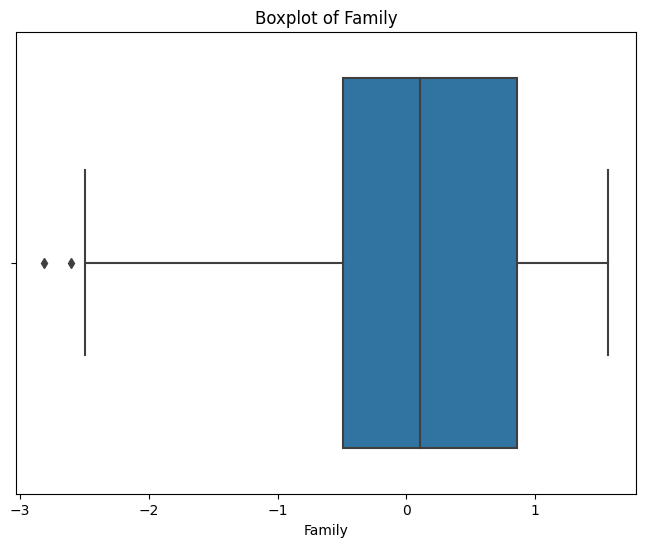

Data type: <class 'list'>


TypeError: Expected 'data' to be a pandas DataFrame.

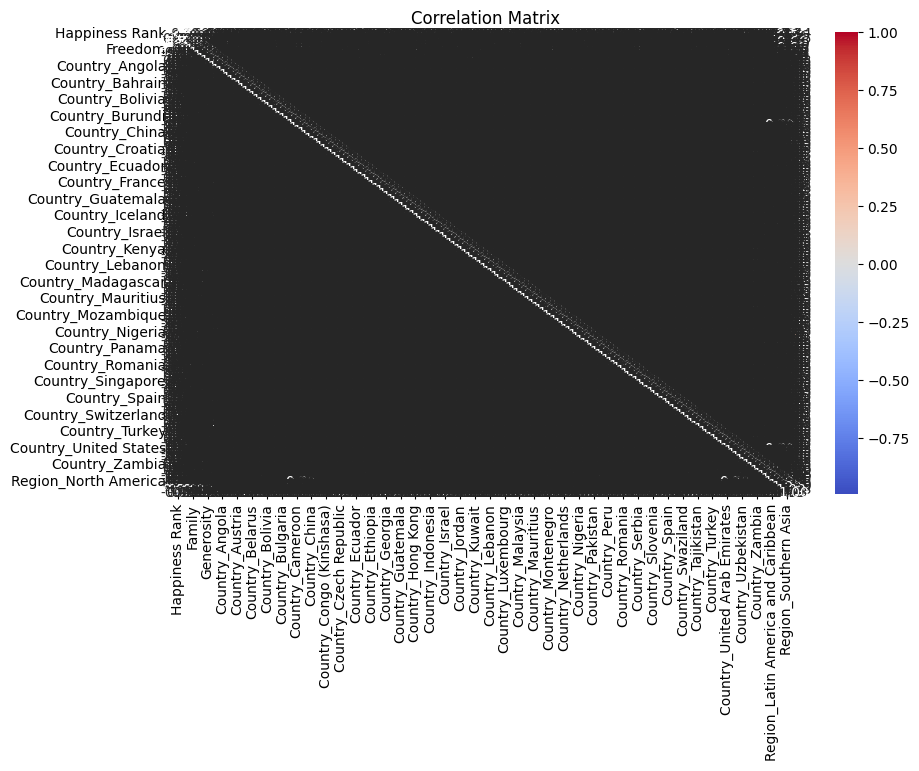

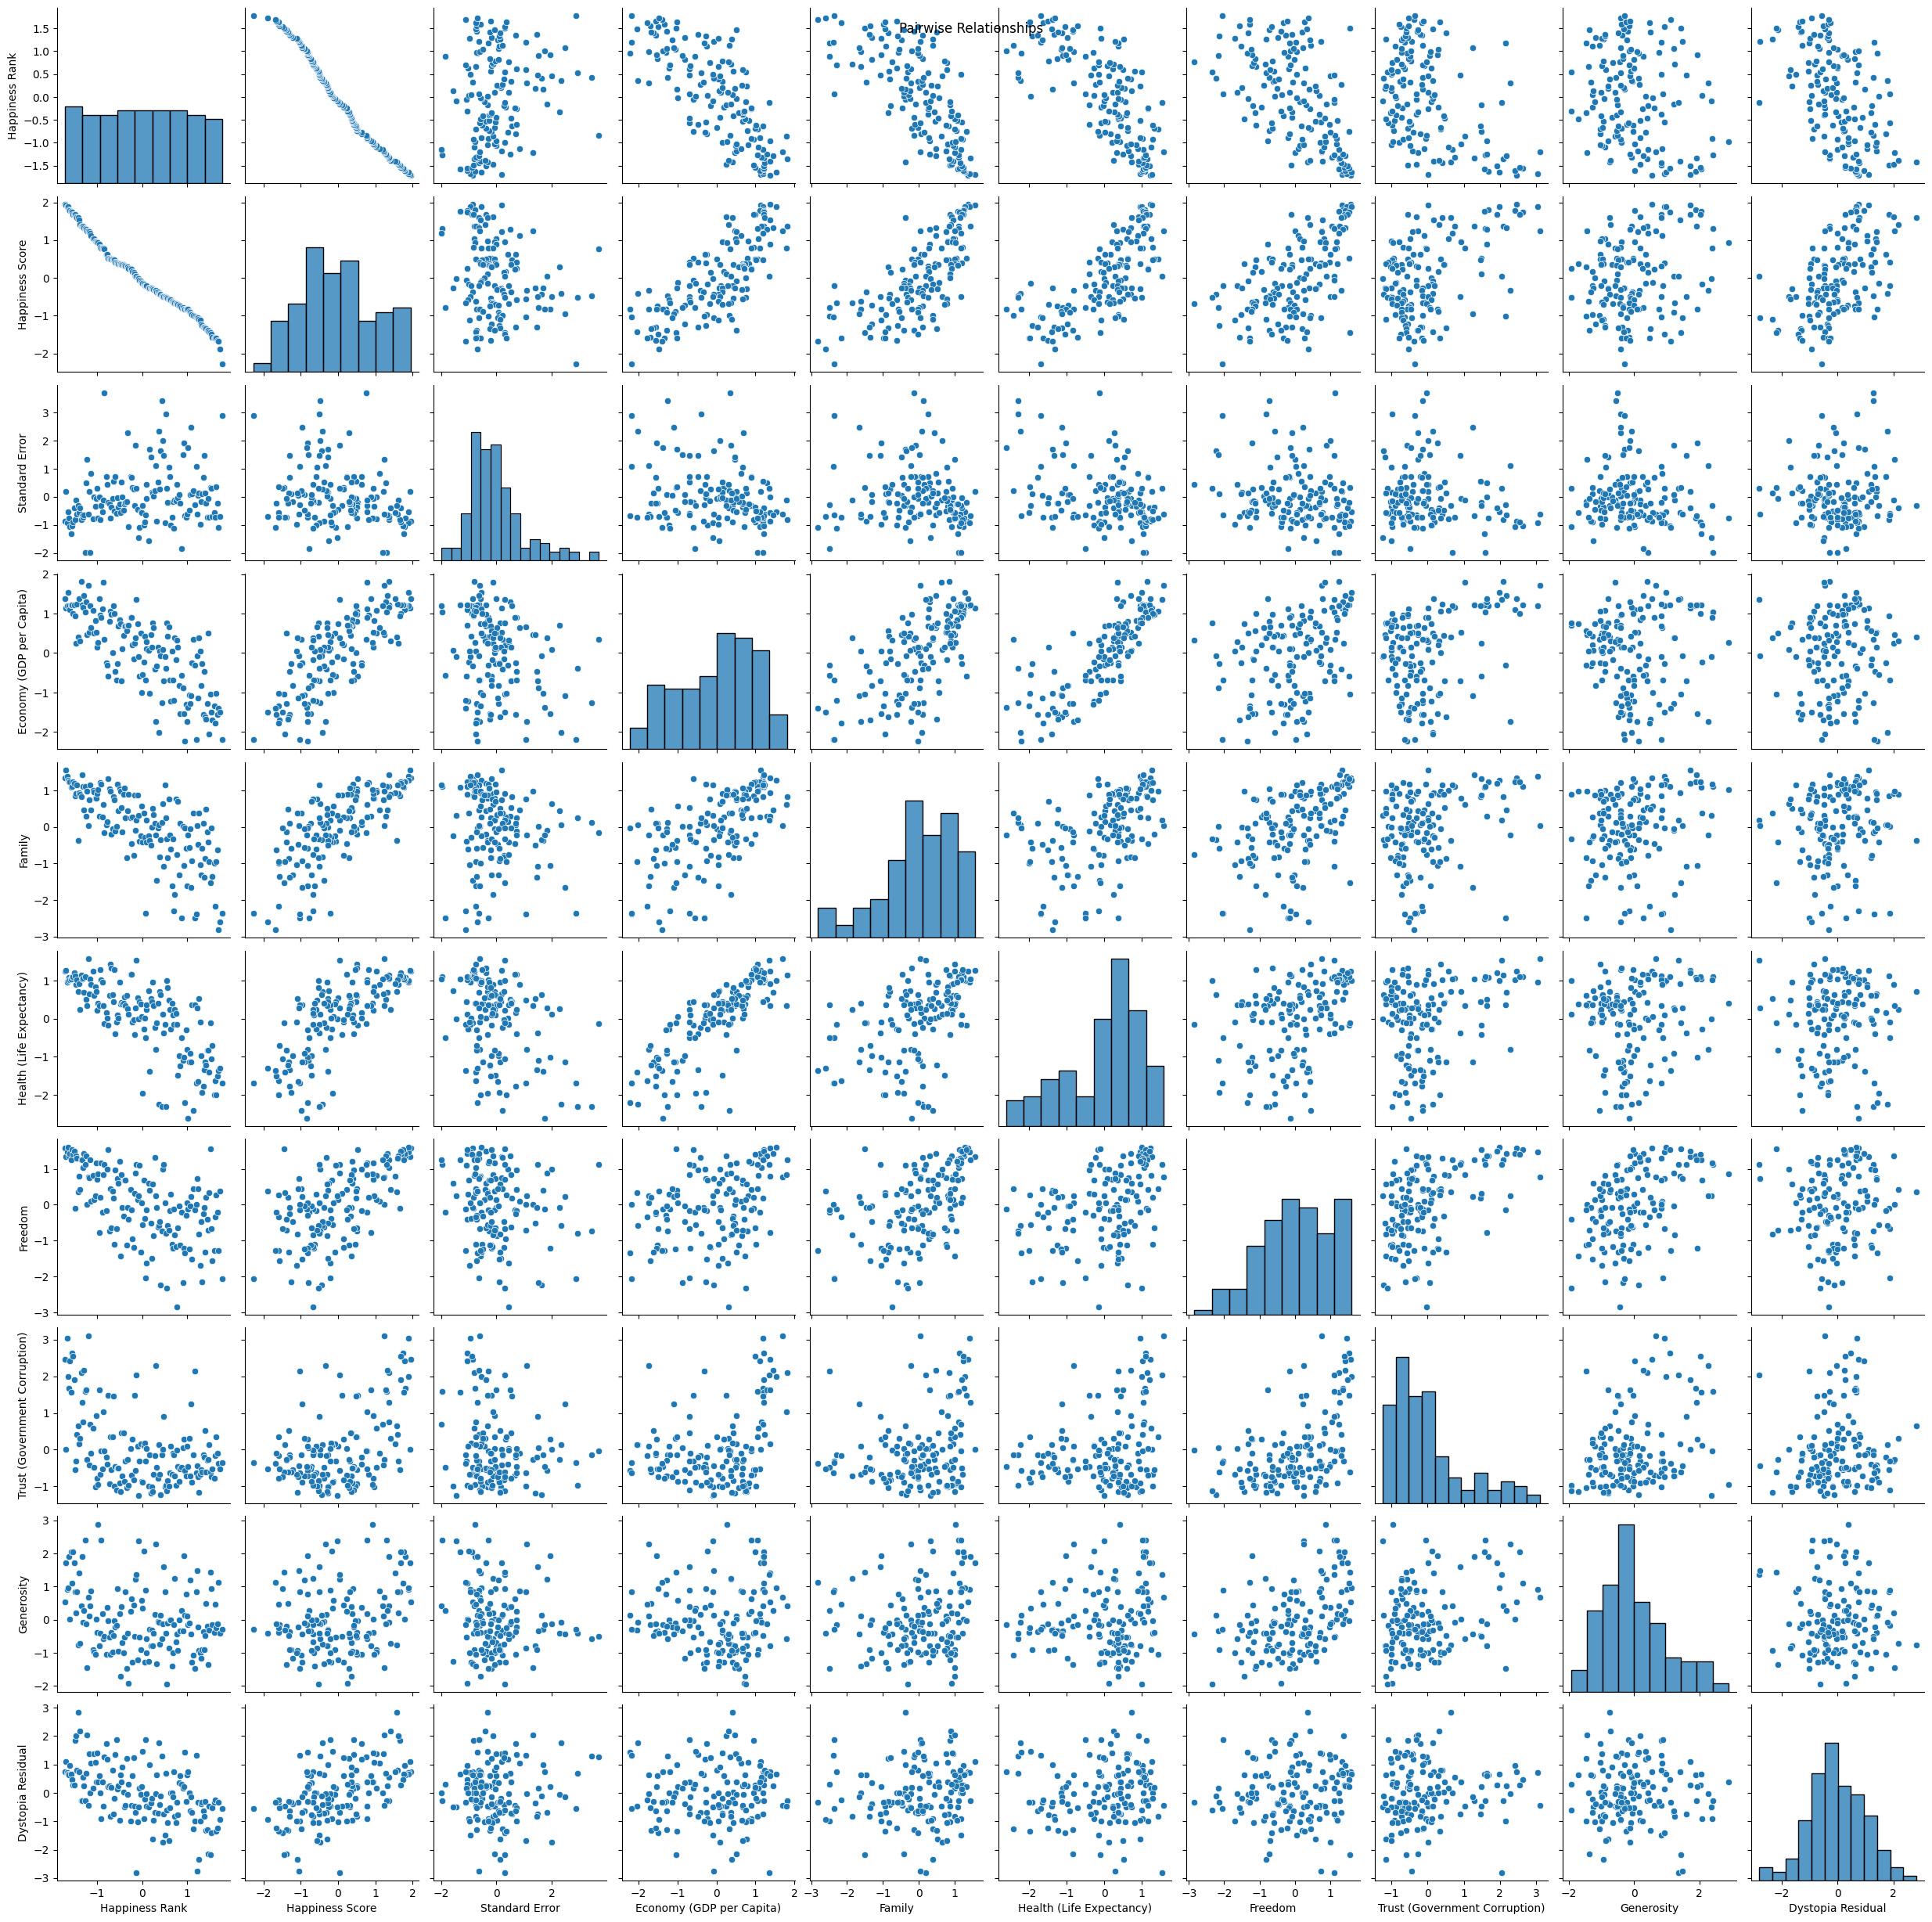

In [84]:
if __name__ == "__main__":
    file_path = "/kaggle/input/gan-model-dataset/2015.csv"  # Path to data file
    # data = pd.read_csv(file_path)
    prompt = "Create an engaging infographic video comparing sales trends over time and regional performance."
    data_storytelling_pipeline(file_path, prompt)
